In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.vq import kmeans, vq

In [40]:
#Load in the individual demographics and scores data
df = pd.read_csv('individual_demographics_and_scores.csv')
df.head(5)

,precinct,probability_race_G,probability_race_P,probability_race_O,gender,age,partisan_score,turnout_score,probability_highest_education_high_school,support_tax_on_wealthy_score,support_progressive_taxation_score,support_cannabis_legalization_score,probability_income_over_100k,probability_children_in_household,support_trump_score
0,precinct__1287,3.0,0.0,97.0,0,50.0,40.0,52.0,44.0,65.0,12.0,23.0,72.0,89.0,77.0
1,precinct__357,1.0,0.0,99.0,1,47.0,98.0,74.0,64.0,80.0,95.0,44.0,20.0,84.0,4.0
2,precinct__347,1.0,0.0,99.0,1,90.0,99.0,60.0,80.0,69.0,31.0,49.0,10.0,18.0,34.0
3,precinct__1318,59.0,31.0,2.0,0,54.0,10.0,12.0,71.0,79.0,8.0,34.0,36.0,52.0,92.0
4,precinct__1379,96.0,2.0,1.0,1,80.0,27.0,94.0,74.0,79.0,86.0,43.0,52.0,12.0,14.0


In [3]:
# shape
df.shape

(3421697, 15)

In [4]:
# Describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
probability_race_G,3417786.0,72.393566,33.789220,0.0,48.0,92.0,97.0,100.0
probability_race_P,3417786.0,3.888193,9.604043,0.0,0.0,0.0,3.0,100.0
probability_race_O,3417786.0,17.672698,31.500268,0.0,0.0,1.0,9.0,100.0
gender,3421697.0,0.453894,0.497870,0.0,0.0,0.0,1.0,1.0
age,3421665.0,50.135698,19.170255,18.0,33.0,50.0,66.0,115.0
partisan_score,3421697.0,47.029032,41.013517,0.0,4.0,39.0,93.0,100.0
turnout_score,3421697.0,68.626945,31.067346,0.0,45.0,82.0,96.0,100.0
probability_highest_education_high_school,3390154.0,50.145489,22.236315,6.0,31.0,51.0,69.0,96.0
support_tax_on_wealthy_score,2082662.0,64.530741,20.202929,8.0,50.0,70.0,81.0,98.0
support_progressive_taxation_score,3390154.0,50.648027,33.384221,2.0,17.0,46.0,87.0,99.0


In [5]:
#Check for null values
df.isnull().sum()/len(df)

precinct                                     0.000000
probability_race_G                           0.001143
probability_race_P                           0.001143
probability_race_O                           0.001143
gender                                       0.000000
age                                          0.000009
partisan_score                               0.000000
turnout_score                                0.000000
probability_highest_education_high_school    0.009219
support_tax_on_wealthy_score                 0.391337
support_progressive_taxation_score           0.009219
support_cannabis_legalization_score          0.009219
probability_income_over_100k                 0.009219
probability_children_in_household            0.009219
support_trump_score                          0.009219
dtype: float64

In [6]:
# Drop null values and unique identifiers bc it's a lot going through 1127 unique precinct
demo_df = df.groupby('precinct').aggregate('mean').reset_index()
df1 = demo_df.dropna().drop('precinct',axis=1)
df1.head(5)

,probability_race_G,probability_race_P,probability_race_O,gender,age,partisan_score,turnout_score,probability_highest_education_high_school,support_tax_on_wealthy_score,support_progressive_taxation_score,support_cannabis_legalization_score,probability_income_over_100k,probability_children_in_household,support_trump_score
0,91.543174,1.708757,3.617026,0.471955,60.447611,25.125165,78.114616,47.443545,54.110325,37.927049,48.352971,50.071004,34.318443,70.612807
1,71.240829,6.686443,17.007018,0.435628,47.248885,46.753346,67.860102,56.795477,67.306818,48.914055,60.918255,43.735057,58.352827,55.883360
2,85.634917,2.543760,7.743351,0.464699,49.284677,44.058343,70.179796,42.730743,66.351549,49.158629,61.281371,56.304686,48.154057,52.282057
3,79.708905,3.855367,12.825745,0.455874,49.786771,34.381509,76.062854,39.929164,58.258974,42.676443,56.211769,65.164545,53.111787,59.028224
4,45.596144,4.797001,39.981253,0.422603,47.660418,80.773433,55.755758,60.143396,75.133028,73.960108,67.950943,28.017251,41.273854,31.042588


In [7]:
# Descriptive information
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1127 entries, 0 to 1126
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   probability_race_G                         1127 non-null   float64
 1   probability_race_P                         1127 non-null   float64
 2   probability_race_O                         1127 non-null   float64
 3   gender                                     1127 non-null   float64
 4   age                                        1127 non-null   float64
 5   partisan_score                             1127 non-null   float64
 6   turnout_score                              1127 non-null   float64
 7   probability_highest_education_high_school  1127 non-null   float64
 8   support_tax_on_wealthy_score               1127 non-null   float64
 9   support_progressive_taxation_score         1127 non-null   float64
 10  support_cannabis_legaliz

In [8]:
#Describe the data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
probability_race_G,1127.0,70.508298,20.932213,12.624398,60.776786,76.768773,86.092036,97.291262
probability_race_P,1127.0,3.641283,2.852389,0.178958,1.719960,2.752584,4.661868,32.405448
probability_race_O,1127.0,18.030220,17.336864,0.359375,6.150744,12.042247,22.269008,85.301868
gender,1127.0,0.454011,0.035215,0.309347,0.436644,0.453172,0.470807,0.666667
age,1127.0,50.798158,7.280590,21.342016,46.280815,49.494076,54.320727,80.626814
partisan_score,1127.0,49.056482,20.454471,6.292135,32.941620,45.085268,64.410875,93.587279
turnout_score,1127.0,68.143227,9.201220,35.555027,61.294513,68.827957,74.986673,87.277936
probability_highest_education_high_school,1127.0,52.357842,13.534570,26.084028,41.350842,52.350324,63.578821,87.490151
support_tax_on_wealthy_score,1127.0,65.343354,7.772387,42.637566,59.567056,65.967742,72.058617,80.920000
support_progressive_taxation_score,1127.0,51.660809,13.865789,16.777778,40.934395,50.069337,61.881224,84.023923


array([[<AxesSubplot:title={'center':'probability_race_G'}>,
        <AxesSubplot:title={'center':'probability_race_P'}>,
        <AxesSubplot:title={'center':'probability_race_O'}>,
        <AxesSubplot:title={'center':'gender'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'partisan_score'}>,
        <AxesSubplot:title={'center':'turnout_score'}>,
        <AxesSubplot:title={'center':'probability_highest_education_high_school'}>],
       [<AxesSubplot:title={'center':'support_tax_on_wealthy_score'}>,
        <AxesSubplot:title={'center':'support_progressive_taxation_score'}>,
        <AxesSubplot:title={'center':'support_cannabis_legalization_score'}>,
        <AxesSubplot:title={'center':'probability_income_over_100k'}>],
       [<AxesSubplot:title={'center':'probability_children_in_household'}>,
        <AxesSubplot:title={'center':'support_trump_score'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

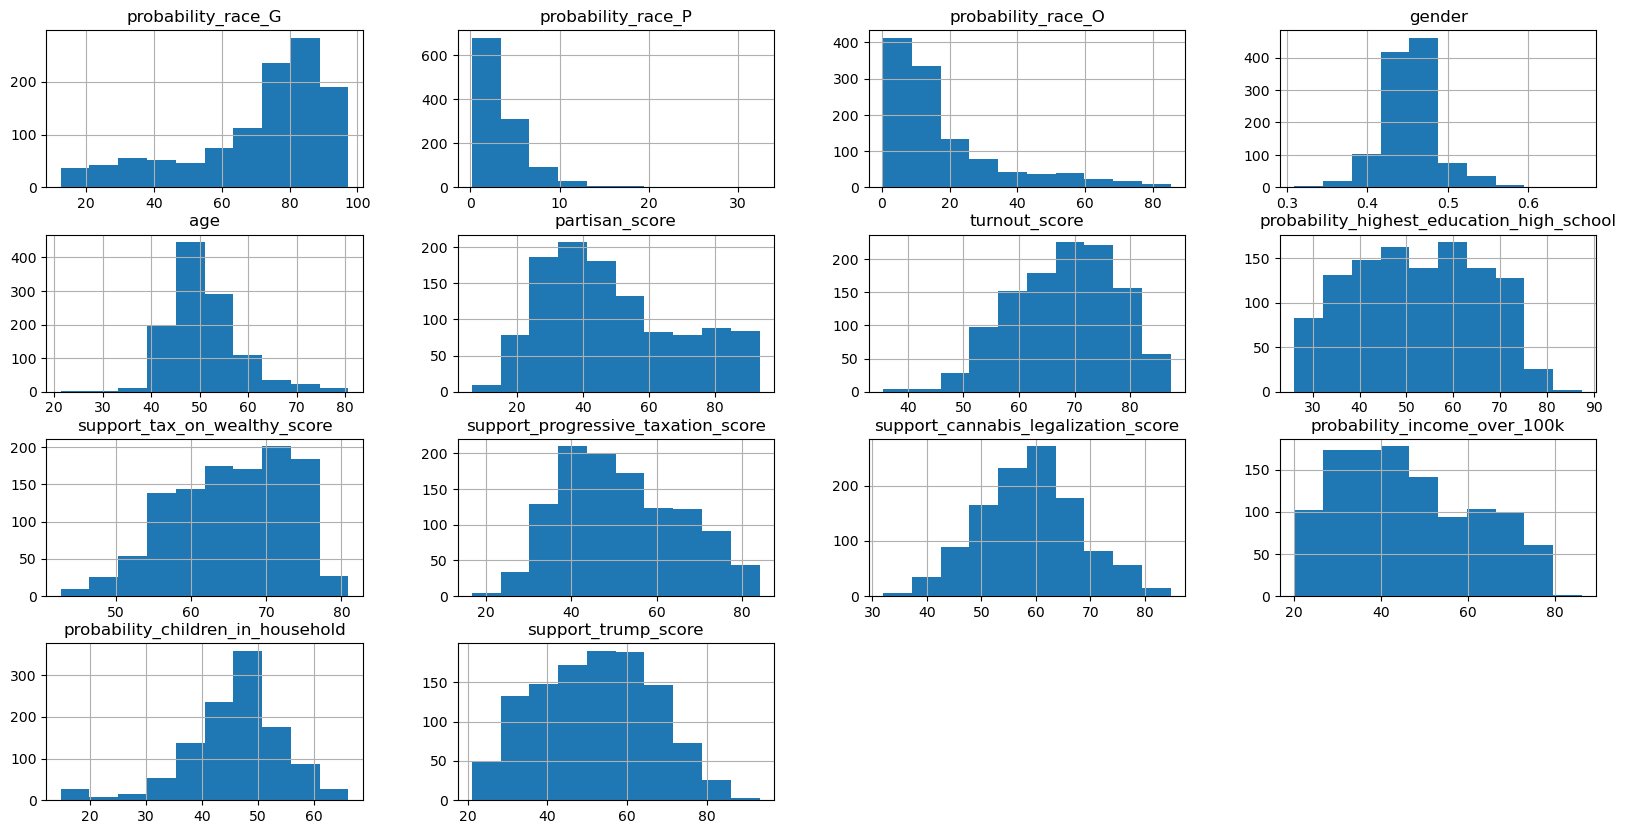

In [9]:
df1.hist(figsize=(20,10))

<AxesSubplot:title={'center':'Correlation Matrix'}>

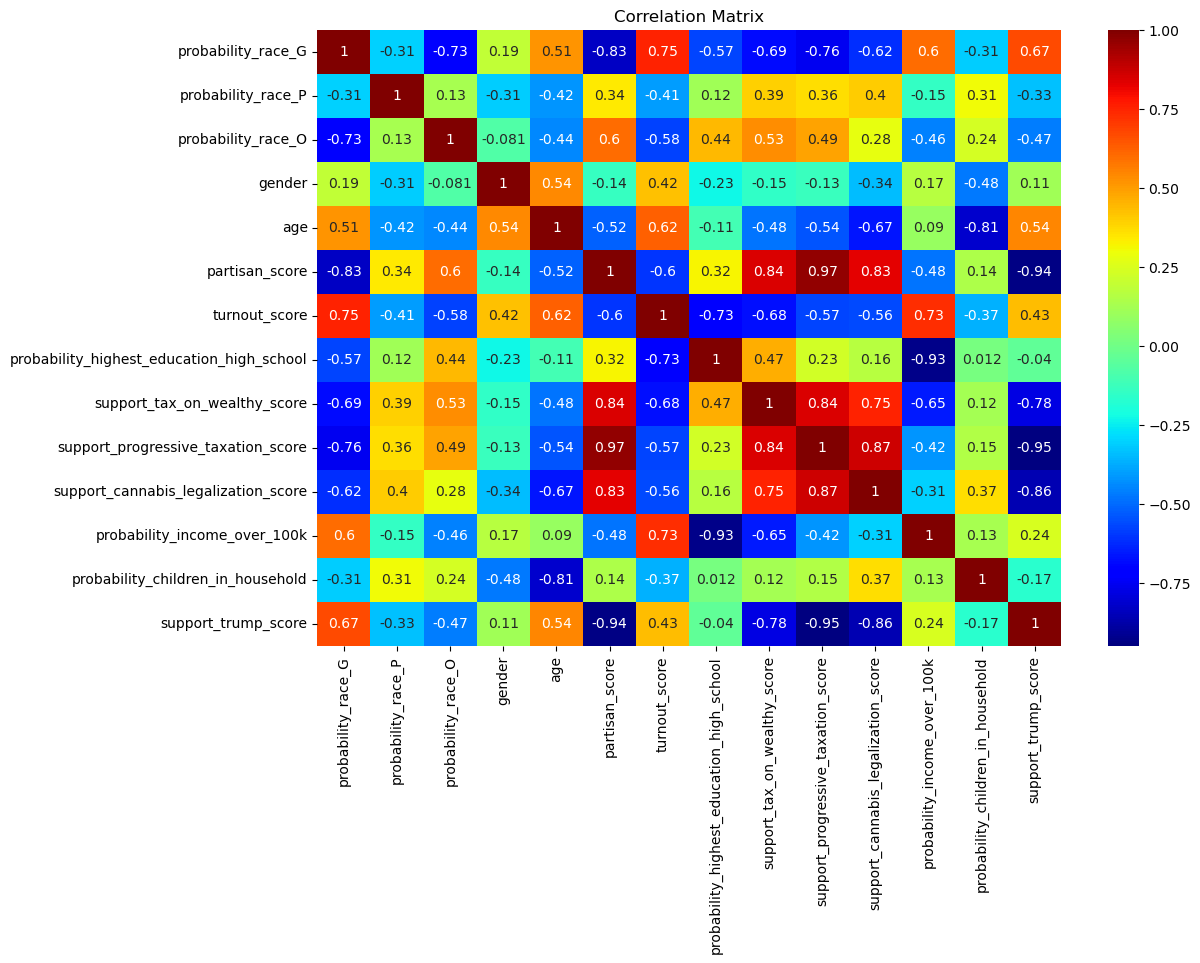

In [10]:
#Correlation matrix
correlation = df1.corr()
plt.figure(figsize=(12,8))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, annot=True, cmap='jet')

As we can see from the image above, there seems to be a mix of correlation between each features. I'll use K-Means clustering algorithm that will explain these in a better light.

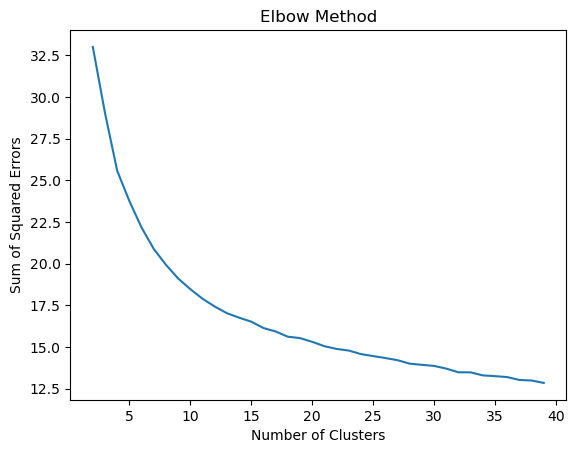

In [16]:
 ''' Choosing the number of Clusters'''
#create empty list for SSEs
sse_list = []

#calculate Sum of Squared Errors (SSE) for different numbers of clusters 
for k in range(2, 40):
    kmeans_instance = kmeans(df1, k)
    sse_list.append(kmeans_instance[1])

#plot SSEs
plt.plot(range(2, 40), sse_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method')
plt.show()

# ############# SEE BELOW FOR THE RESULTS. RUNNING THIS TAKES 78 MINUTES ##############

We'll select 10 as our number of clusters. "Elbow Method"

In [17]:
# Create kmeans instance 
kmeans_instance = kmeans(df1, 10)
#Generate cluster labels for each point 
cluster_labels, _ = vq(df1, kmeans_instance[0])

#Coordinates of cluster centers 
cluster_centers = kmeans_instance[0]

# # of datapoints that lie in each cluster around their respectiv mean
cluster_counts = np.bincount(cluster_labels)

#print cluster labels and cluster centers 
# print(cluster_labels)
# print(cluster_centers)

In [19]:
df2 = df1.copy()
df2['cluster_labels'] = cluster_labels

#calculate mean values of each demographic feature for each cluster 
cluster_means = df2.groupby('cluster_labels').mean()

#print mean values for each cluster 
# print(cluster_means)

cluster_means_df = pd.DataFrame(cluster_means)
cluster_means_df

,probability_race_G,probability_race_P,probability_race_O,gender,age,partisan_score,turnout_score,probability_highest_education_high_school,support_tax_on_wealthy_score,support_progressive_taxation_score,support_cannabis_legalization_score,probability_income_over_100k,probability_children_in_household,support_trump_score
cluster_labels,,,,,,,,,,,,,,
0,91.961897,1.744244,3.975453,0.510952,67.371494,30.248891,80.904908,47.716297,57.890444,38.152486,44.680411,49.476657,26.417990,66.268575
1,87.411153,2.378736,7.191369,0.437995,57.185258,23.209630,68.724699,65.066324,59.417827,33.361078,48.452032,35.727315,41.166901,75.010277
2,80.862771,3.570192,10.264213,0.451485,48.278564,32.523359,73.212809,42.674297,58.228939,40.724394,54.173833,63.556933,54.954848,61.220953
3,89.454645,1.684884,4.406758,0.468294,54.659917,34.415598,79.853483,31.250006,53.572554,42.491936,53.756866,72.429116,44.044753,58.315367
4,33.946355,4.449802,56.398317,0.453899,45.046126,79.607652,56.822495,65.514838,73.390201,68.100384,64.011056,30.959089,48.304839,36.450106
5,62.010503,4.650079,28.271021,0.450581,47.627835,54.412974,62.338031,58.316699,70.648561,55.444392,61.124513,38.293055,48.669571,48.523228
6,67.821424,5.711373,19.608503,0.428803,44.707714,70.654064,64.396519,48.545302,74.342607,68.947999,70.964405,42.827714,45.019343,33.140869
7,74.527173,3.710894,17.551479,0.448895,50.646068,39.668179,65.963554,59.725346,65.852450,45.020079,56.858927,39.625490,48.154799,59.922452
8,26.727621,5.436414,4.950331,0.439038,48.859177,84.570603,55.682505,72.322943,74.286785,76.519379,76.443389,23.703362,47.659469,32.963287


In [21]:
# Find max value of our cluster_means value. With the code below, it's around 91.
int(cluster_means_df.max().sort_values(ascending=False)[0])

91

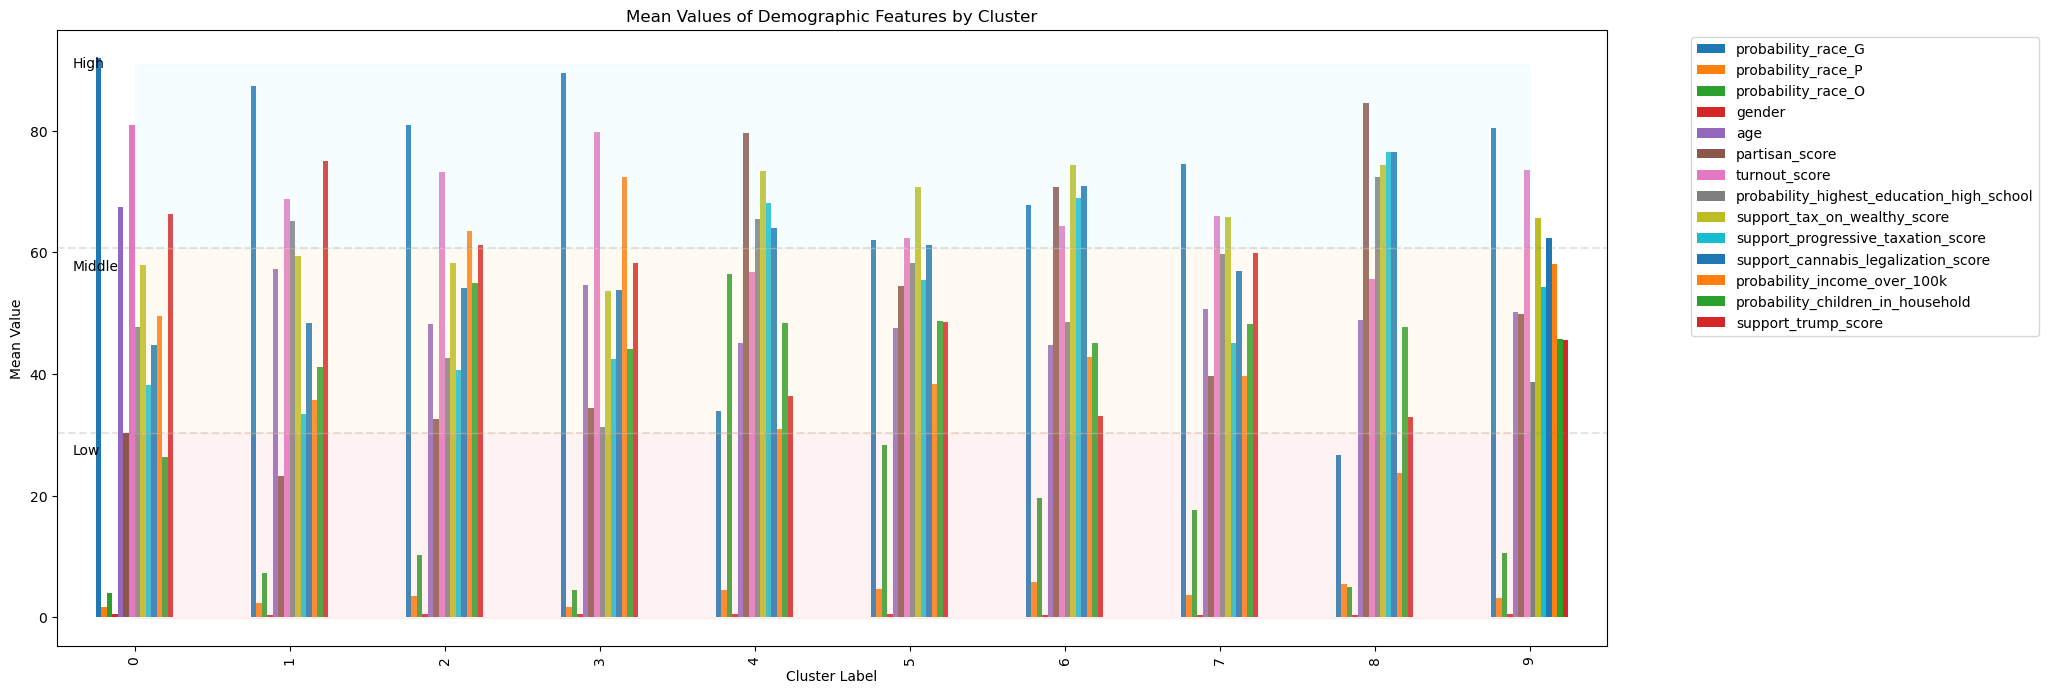

In [22]:
# Plotting the kmeans result
cluster_means_df.plot.bar(figsize=(20, 8))
plt.title('Mean Values of Demographic Features by Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')

# Separate the regions for low, middle, high
y_max = int(cluster_means_df.max().sort_values(ascending=False)[0])
plt.axhline(y= y_max/3, linestyle='--', color='gray', alpha=0.2)
plt.axhline(y= (y_max*2)/3, linestyle='--', color='gray', alpha=0.2)

# Fill the regions between the lines with colors
plt.fill_between(cluster_means_df.index, -0.1, y_max/3, color='#FFC2C2', alpha=0.2)
plt.fill_between(cluster_means_df.index, y_max/3, (y_max*2)/3, color='#FFEBC2', alpha=0.2)
plt.fill_between(cluster_means_df.index, (y_max*2)/3, y_max, color='#D2F5FF', alpha=0.2)

# Add labels
plt.text(-0.4, (y_max/3)-3, "Low", ha="left", va="center")
plt.text(-0.4, (y_max*2)/3-3, "Middle", ha="left", va="center")
plt.text(-0.4, y_max, "High", ha="left", va="center")


plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

| Cluster| Features | Counts |
| --- | --- | --- |
| Cluster 0	 | High Age, Low Partisan score, High Turnout score, Moderate probability of education is highschool, Mid-High support tax on wealthy score, Moderate support progressive taxation score, Moderate support cannibis legalization score, Low-Mid probability income over 100K, Low probability of children in household, High Trump Score |140292 |
| Cluster 1	 | Middle Age, Low Partisan score, High Turnout score, High probability of education is highschool, Mid-High support tax on wealthy score, Low-Mid support progressive taxation score, Moderate support cannibis legalization score, Low-Mid probability income over 100K, Moderate probability of children in household, High Trump Score |241820|
| Cluster 2	 | Moderate Age, Low-Mid Partisan score, High Turnout score, Moderate probability of education is highschool, Moderate support tax on wealthy score, Moderate support progressive taxation score, Moderate support cannibis legalization score, High probability income over 100K, Moderate probability of children in household, High Trump Score |241820 |
| Cluster 3	 | Middle Age, Low-Mid Partisan score, High Turnout score, Low-Mid probability of education is highschool, Moderate support tax on wealthy score, Moderate support progressive taxation score, Moderate support cannibis legalization score, High probability income over 100K, Moderate probability of children in household, Mid-High Trump Score |180903|
| Cluster 4	 | Middle Age, High Partisan score, Moderate Turnout score, High probability of education is highschool, High support tax on wealthy score, High support progressive taxation score, High support cannibis legalization score, Low probability income over 100K, Moderate probability of children in household, Low-Mid Trump Score |251050|
| Cluster 5	 | Middle Age, Moderate Partisan score, High Turnout score, Moderate probability of education is highschool, High support tax on wealthy score, Moderate-High support progressive taxation score, High support cannibis legalization score, Moderate probability income over 100K, Moderate probability of children in household, Moderate Trump Score |223360|
| Cluster 6	 | Middle Age, High Partisan score, High Turnout score, Moderate probability of education is highschool, High support tax on wealthy score, High support progressive taxation score, High support cannibis legalization score, Moderate probability income over 100K, Moderate probability of children in household, Low-Mid Trump Score |197517|
| Cluster 7	 | Middle Age, Low-Moderate Partisan score, High Turnout score, High probability of education is highschool, High support tax on wealthy score, Moderate support progressive taxation score, Moderate-High support cannibis legalization score, Moderate probability income over 100K, Moderate probability of children in household, High Trump Score |249204|
| Cluster 8	 | Middle Age, High Partisan score, Moderate Turnout, High probability of education is highschool, High support tax on wealthy score, High support progressive taxation score, High support cannibis legalization score, Low probability income over 100K, Moderate probability of children in household, Low-Moderate Trump Score |107065|
| Cluster 9	 | Middle Age, Moderate Partisan score, High Turnout score, Moderate probability of education is highschool, High support tax on wealthy score, Moderate support progressive taxation score, High support cannibis legalization score, Moderate probability income over 100K, Moderate probability of children in household, Moderate Trump Score | 275047 |

That's a lot of clusters to look at, but the key takeaways from these clusters are:
* Partisan, support tax on wealthy, support progressive taxation, and support legalizing cannibis are inversely correlated with support Trump score
* The probability of highest education is highschool is inversely correlated with probability income over 100K
* Support legalizing Cannibis is positively correlated with support progresive taxation, tax on wealthy, and partisan score. They are all positively correlated with one another.
* Turnout score has positive correlation with age & probability of income over 100K and negative correlation with probability highest education being high school

We can also compare our clustering results to the correlation matrix and we would find the expected relationship to be similar.

C:\Users\antho\AppData\Local\Temp\ipykernel_19568\1654319107.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = new_df.mean()


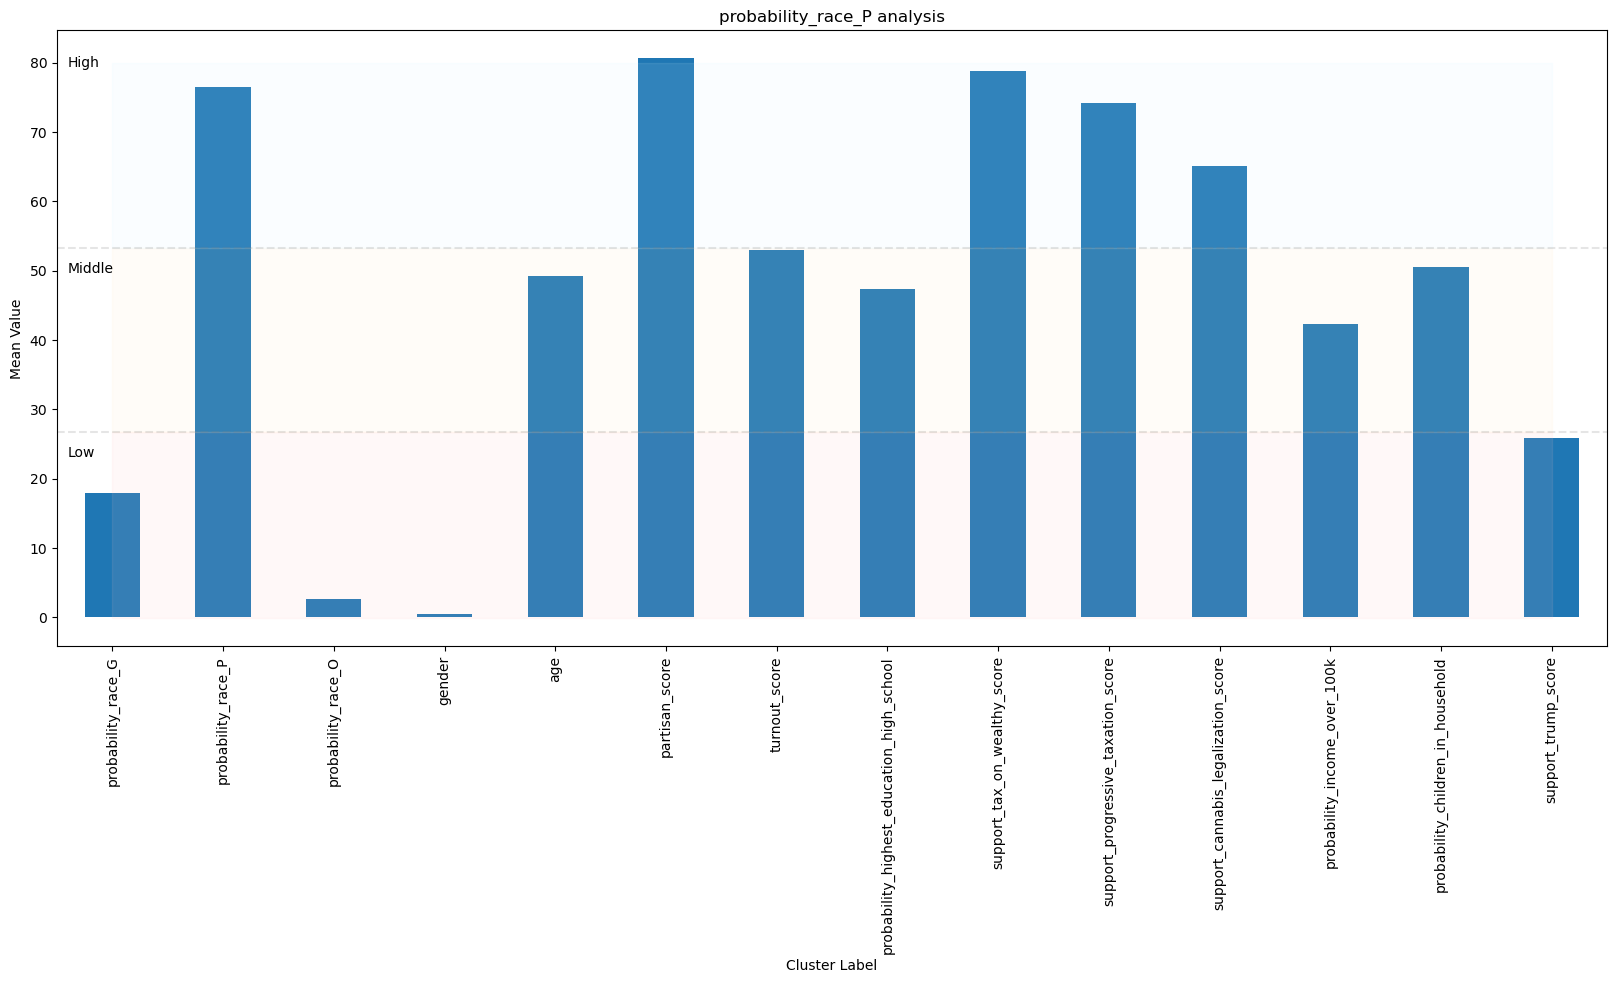

In [41]:
# Bar chart for the probability_race_P
new_df = df[df['probability_race_P']>60].dropna()
df2 = new_df.mean()
df2.plot.bar(df2.index, df2.values, figsize=(20,8))
plt.title('probability_race_P analysis')
plt.xlabel('Cluster Label')
plt.ylabel('Mean Value')

# Separate the regions for low, middle, high
y_max_O = int(df2.max())
plt.axhline(y= y_max_O/3, linestyle='--', color='gray', alpha=0.2)
plt.axhline(y= (y_max_O*2)/3, linestyle='--', color='gray', alpha=0.2)

# Fill the regions between the lines with colors
plt.fill_between(df2.index, -0.1, y_max_O/3, color='#FFC2C2', alpha=0.1)
plt.fill_between(df2.index, y_max_O/3, (y_max_O*2)/3, color='#FFEBC2', alpha=0.1)
plt.fill_between(df2.index, (y_max_O*2)/3, y_max_O, color='#D2F5FF', alpha=0.1)

# Add labels
plt.text(-0.4, (y_max_O/3)-3, "Low", ha="left", va="center")
plt.text(-0.4, (y_max_O*2)/3-3, "Middle", ha="left", va="center")
plt.text(-0.4, y_max_O, "High", ha="left", va="center")
plt.show()

probability_race_P

| Cluster| Features |
| --- | --- |
| Cluster 0	 | Middle Age, High Partisan score, Moderate Turnout score, Moderate probability of education is highschool, High support tax on wealthy score, High support progressive taxation score, High support cannibis legalization score, Moderate probability income over 100K, Moderate probability of children in household, Low Trump Score |

The key takeaway from this approach is understanding the intuition behind the clustering algorithm. This was my first approach of understanding the relationship between each features. I used visualization techniques to qualitatively interpret the mean values of the variables in each cluster and gain an understanding of the expected behavior of a cluster member. This demonstrated the effectiveness of clustering in uncovering the distinct groups of individual voters and their shared characteristics.

In [47]:
# FOR QUICKER BASIC EDA ANALYSIS USING PANDAS BUILT IN

# from pandas_profiling import ProfileReport

# demo_profile = ProfileReport(df1,title="Individual Demographic Report")
# demo_profile.to_notebook_iframe()
# demo_profile.to_file('Demographic.html')

####### REFER TO THE DEMOGRAPHIC.HTML FILE IN THE FOLDER #######